___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

#  Matrix Plots

**NOTE: Make sure to watch the video lecture, not all datasets are well suited for a heatmap or clustermap.**

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

World Population Prospects publishes United Nations population estimates for all world countries and every year from 1950 to 2020, as well as projections for different scenarios (low, middle and high variants) from 2020 to 2100. The figures presented here correspond to middle variant projections for the given year.

https://www.ined.fr/en/everything_about_population/data/all-countries/?lst_continent=900&lst_pays=926

Source : Estimates for the current year based on data from the World Population Prospects. United Nations.

In [3]:
# 2020 Projections
df = pd.read_csv('country_table.csv')

In [4]:
df

,Countries,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
0,AFRICA,32.577,7.837,63.472,44.215,24.40
1,ASIA,15.796,7.030,73.787,23.185,8.44
2,EUROPE,10.118,11.163,78.740,3.750,0.38
3,LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
4,NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
5,OCEANIA,16.235,6.788,78.880,16.939,12.79
6,WORLD,17.963,7.601,72.766,27.492,10.36


## Heatmap

In [5]:
df = df.set_index('Countries')

In [6]:
df

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
OCEANIA,16.235,6.788,78.880,16.939,12.79
WORLD,17.963,7.601,72.766,27.492,10.36


<Axes: ylabel='Countries'>

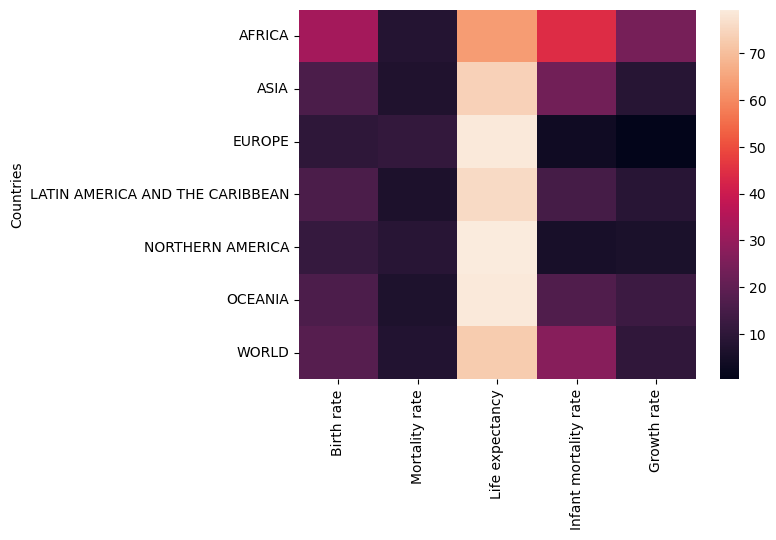

In [8]:
# life expectancy is in different units -- thus the coloring is different
# other 4 features of the heatmap are percentage rates
sns.heatmap(df)

In [10]:
rates = df.drop('Life expectancy',axis=1) # droping "Life Expectancy" 

### Therefore:
do not add different units in a heatmap, every feature of the dataset should have the same units to make more sense of the heatmap (for different units -- different colors will be used)

<Axes: ylabel='Countries'>

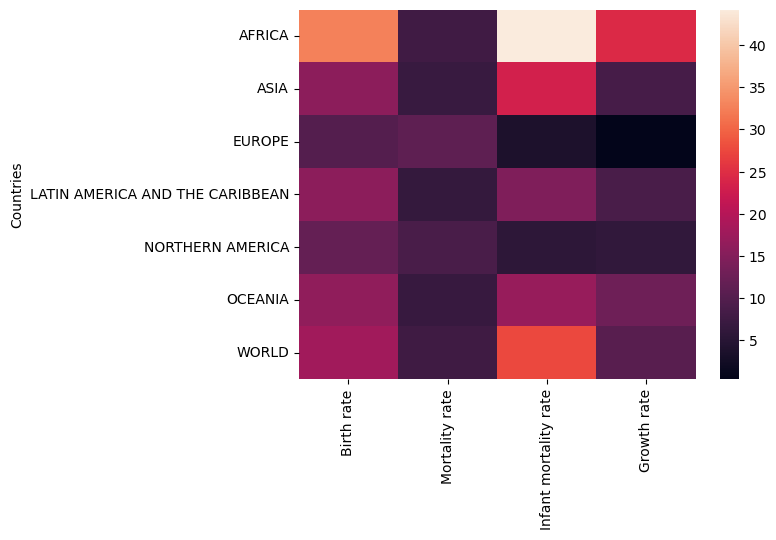

In [15]:
sns.heatmap(rates)

<Axes: ylabel='Countries'>

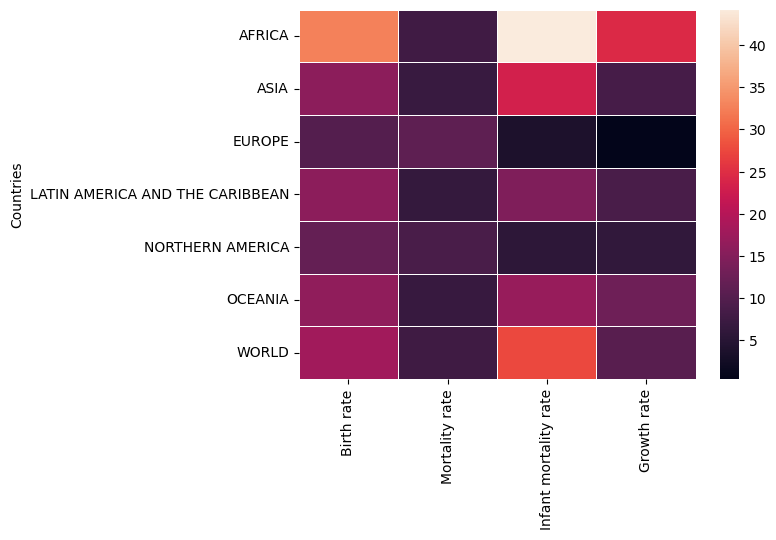

In [13]:
sns.heatmap(rates,linewidth=0.5) # adding lw

<Axes: ylabel='Countries'>

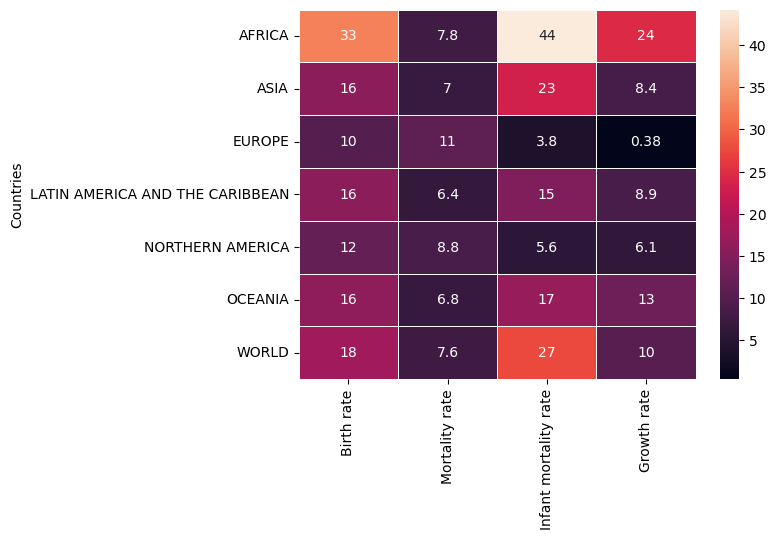

In [13]:
sns.heatmap(rates,linewidth=0.5,annot=True) # annotate the numbers on the heatmap

<Axes: ylabel='Countries'>

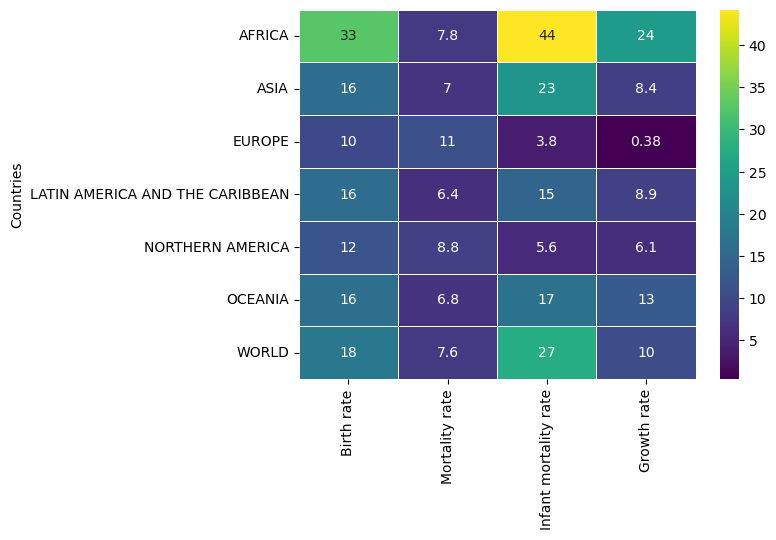

In [12]:
# Note how its not palette here, it's cmap : colormap
sns.heatmap(rates,linewidth=0.5,annot=True,cmap='viridis')

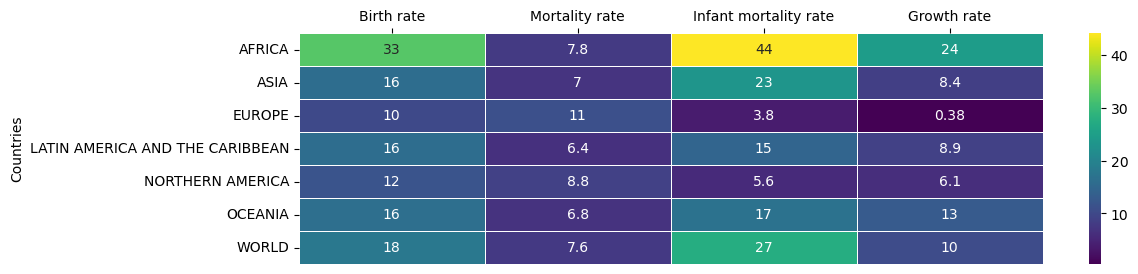

In [25]:
plt.figure(figsize=(12,3))
ax = sns.heatmap(rates,linewidth=0.5,annot=True,cmap='viridis')
ax.xaxis.tick_top() # overlapping

<Axes: ylabel='Countries'>

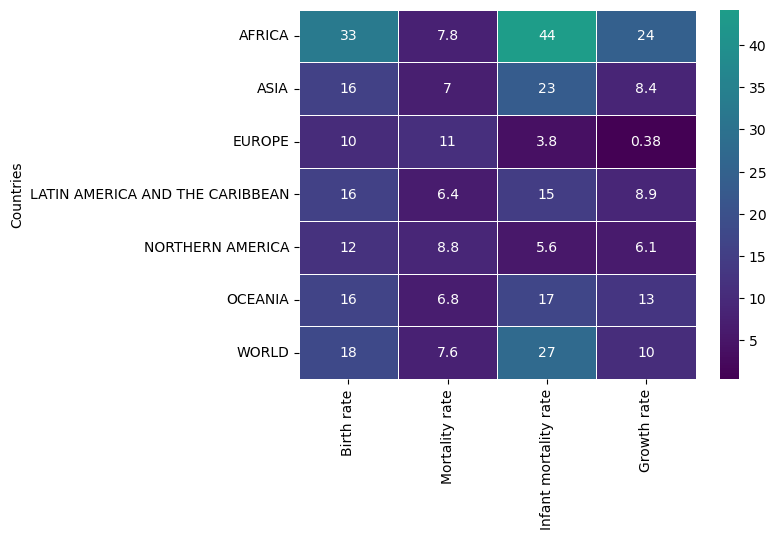

In [27]:
# Set colorbar based on value from dataset
sns.heatmap(rates,linewidth=0.5,annot=True,cmap='viridis',center=40)
# now center is at 40, means yellow color will come after 90 and go till 100

<Axes: ylabel='Countries'>

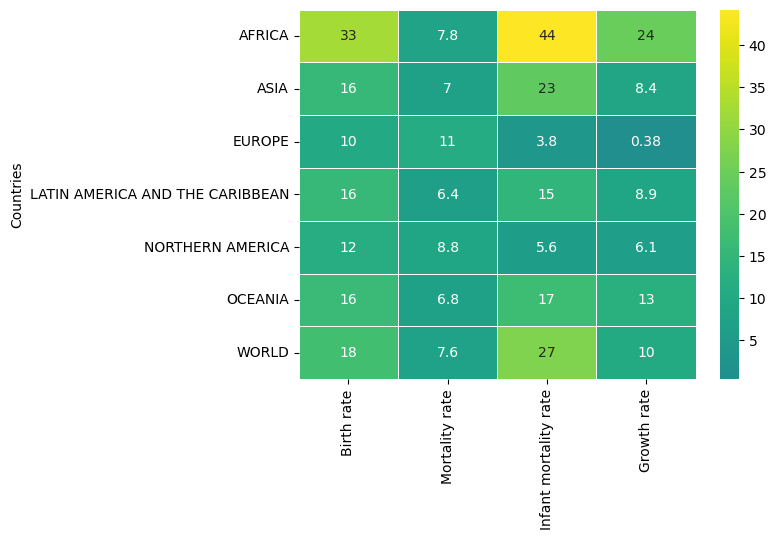

In [28]:
# Set colorbar based on value from dataset
sns.heatmap(rates,linewidth=0.5,annot=True,cmap='viridis',center=1)

## Clustermap

Plot a matrix dataset as a hierarchically-clustered heatmap.

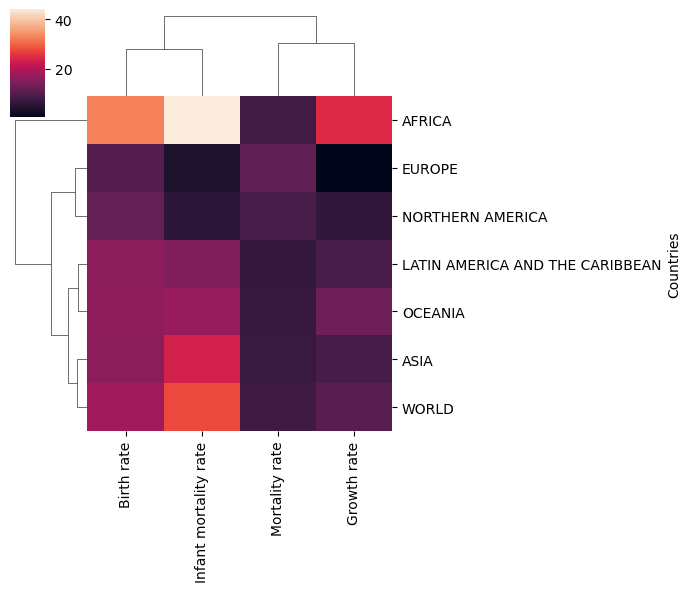

In [39]:
sns.clustermap(rates,figsize=(7,6))

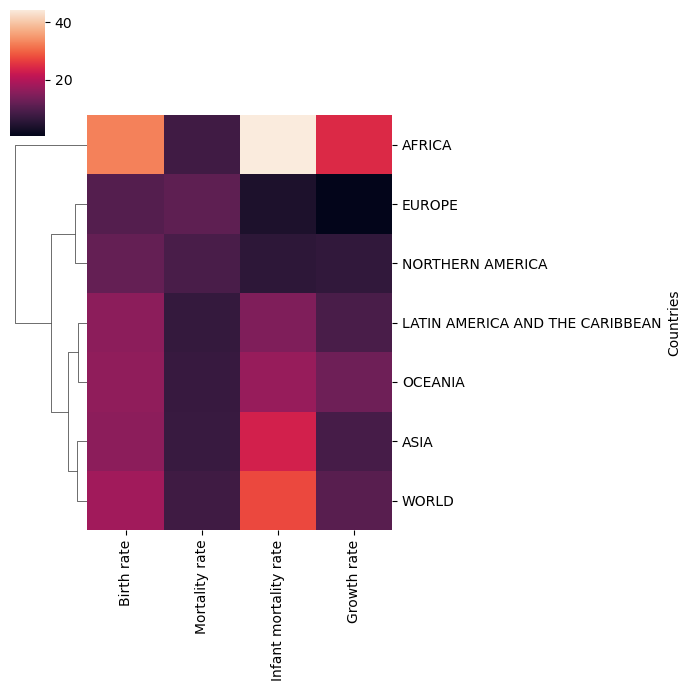

In [40]:
sns.clustermap(rates,figsize=(7,7), col_cluster=False) # column cluster doesn't make a lot of sense here 

## what we understand from the above plot:
1. europe and north america are clustered: they have similar data because both are highly developed
2. asia and world are clustered: asia is the largest continent close the size of world thus it makes sense that asia and the world have similar data
3. africa is not clustered to anyone: considerably poor their data is not close to other continents thus they cannot be clustered to anyone else

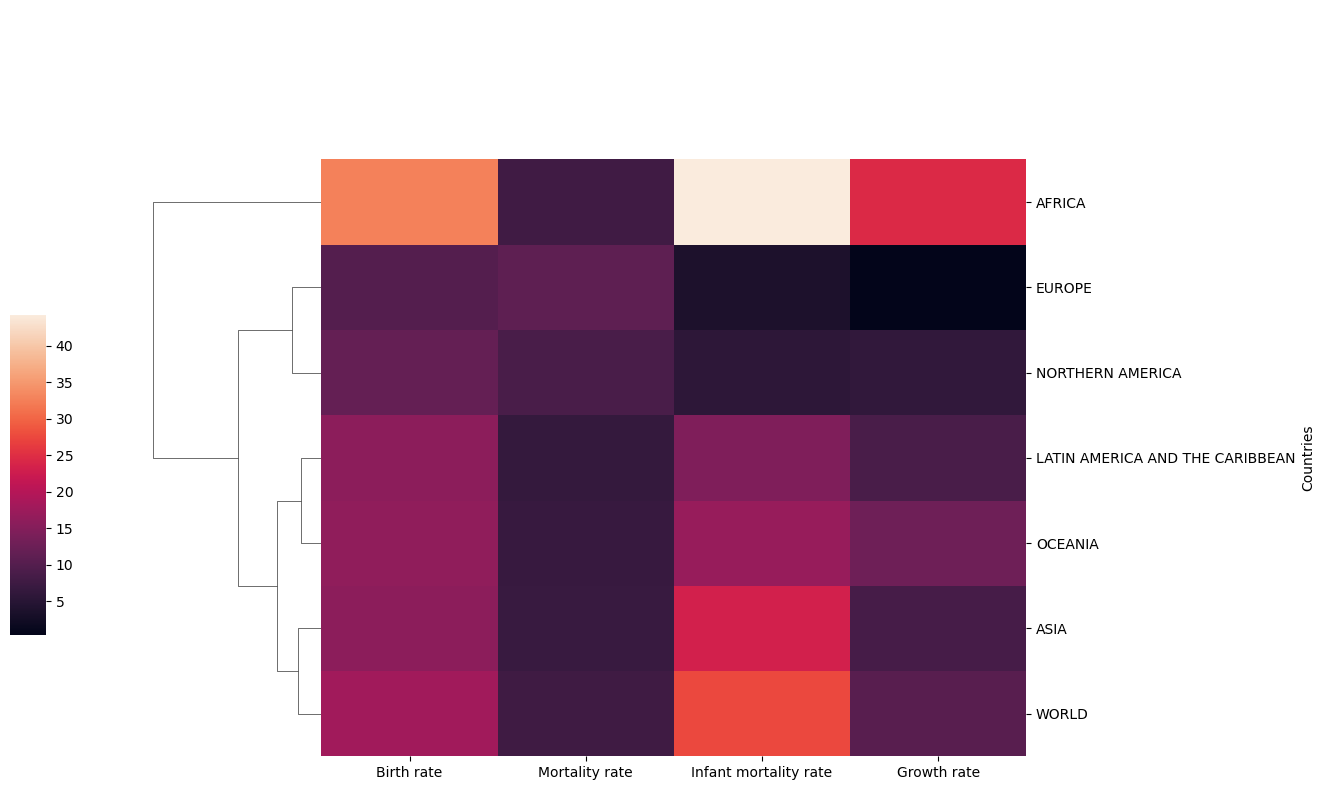

In [42]:
# nicely decorating clustermap
sns.clustermap(rates,col_cluster=False,figsize=(12,8),cbar_pos=(-0.1, .2, .03, .4))

In [43]:
rates.index.set_names('',inplace=True)

In [44]:
rates

,Birth rate,Mortality rate,Infant mortality rate,Growth rate
,,,,
AFRICA,32.577,7.837,44.215,24.40
ASIA,15.796,7.030,23.185,8.44
EUROPE,10.118,11.163,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,14.570,8.89
NORTHERN AMERICA,11.780,8.833,5.563,6.11
OCEANIA,16.235,6.788,16.939,12.79
WORLD,17.963,7.601,27.492,10.36


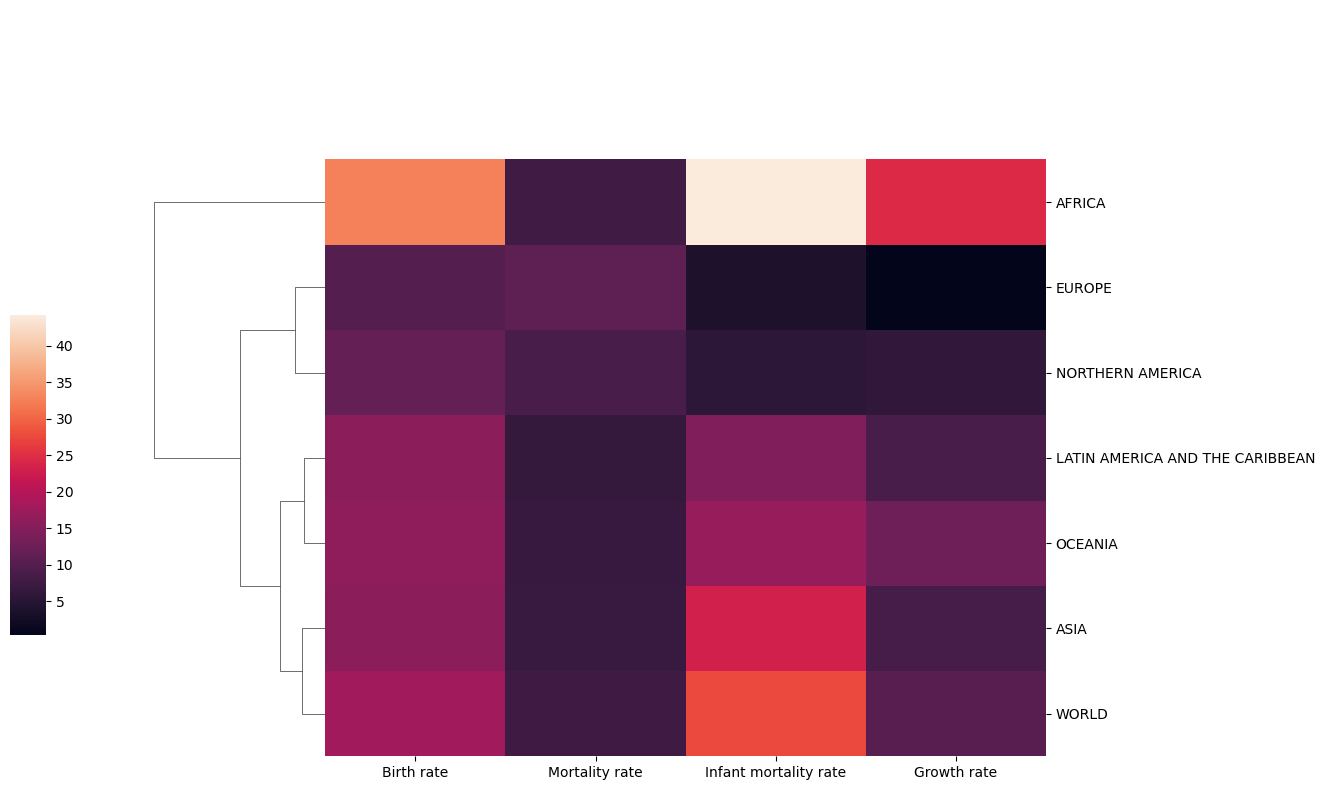

In [45]:
# Recall you can always edit the DF before seaborn
sns.clustermap(rates,col_cluster=False,figsize=(12,8),cbar_pos=(-0.1, .2, .03, .4))

----
----
### completed on 2nd may 2023